In [219]:
clear all
pkg load control
x_model_sheet

error: 'J_x' undefined near line 9, column 9
error: called from
    x_model_sheet at line 9 column 5


---

## X-axis feedback : $D_\theta$ in direct path

k = 0.8910


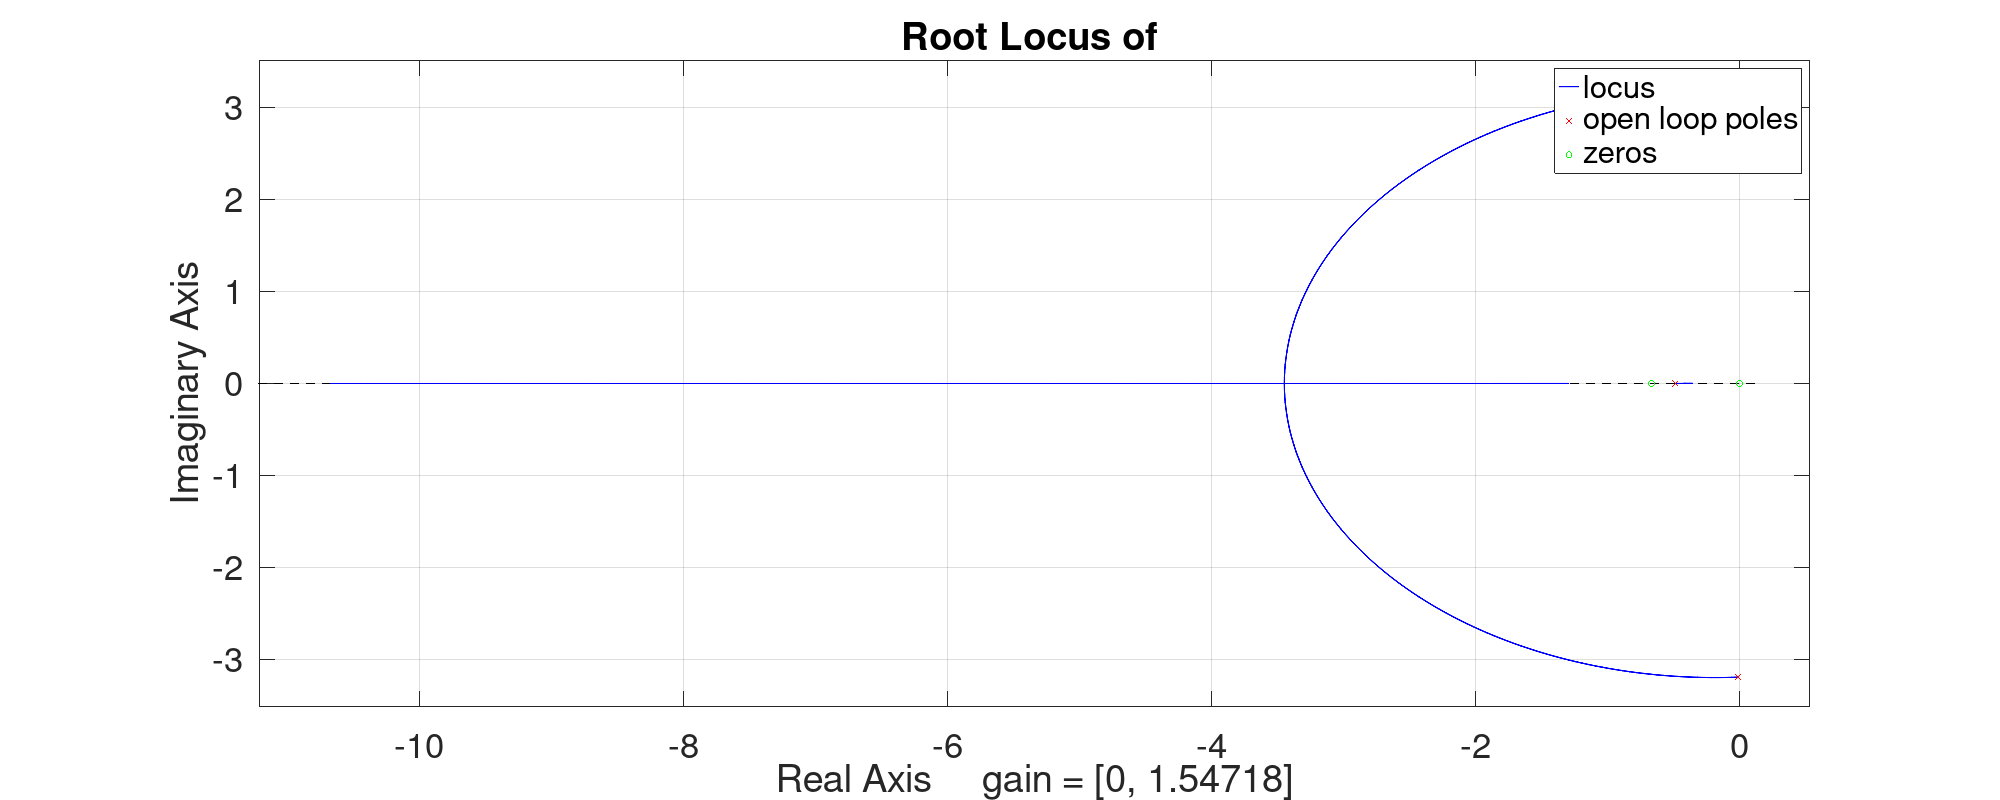

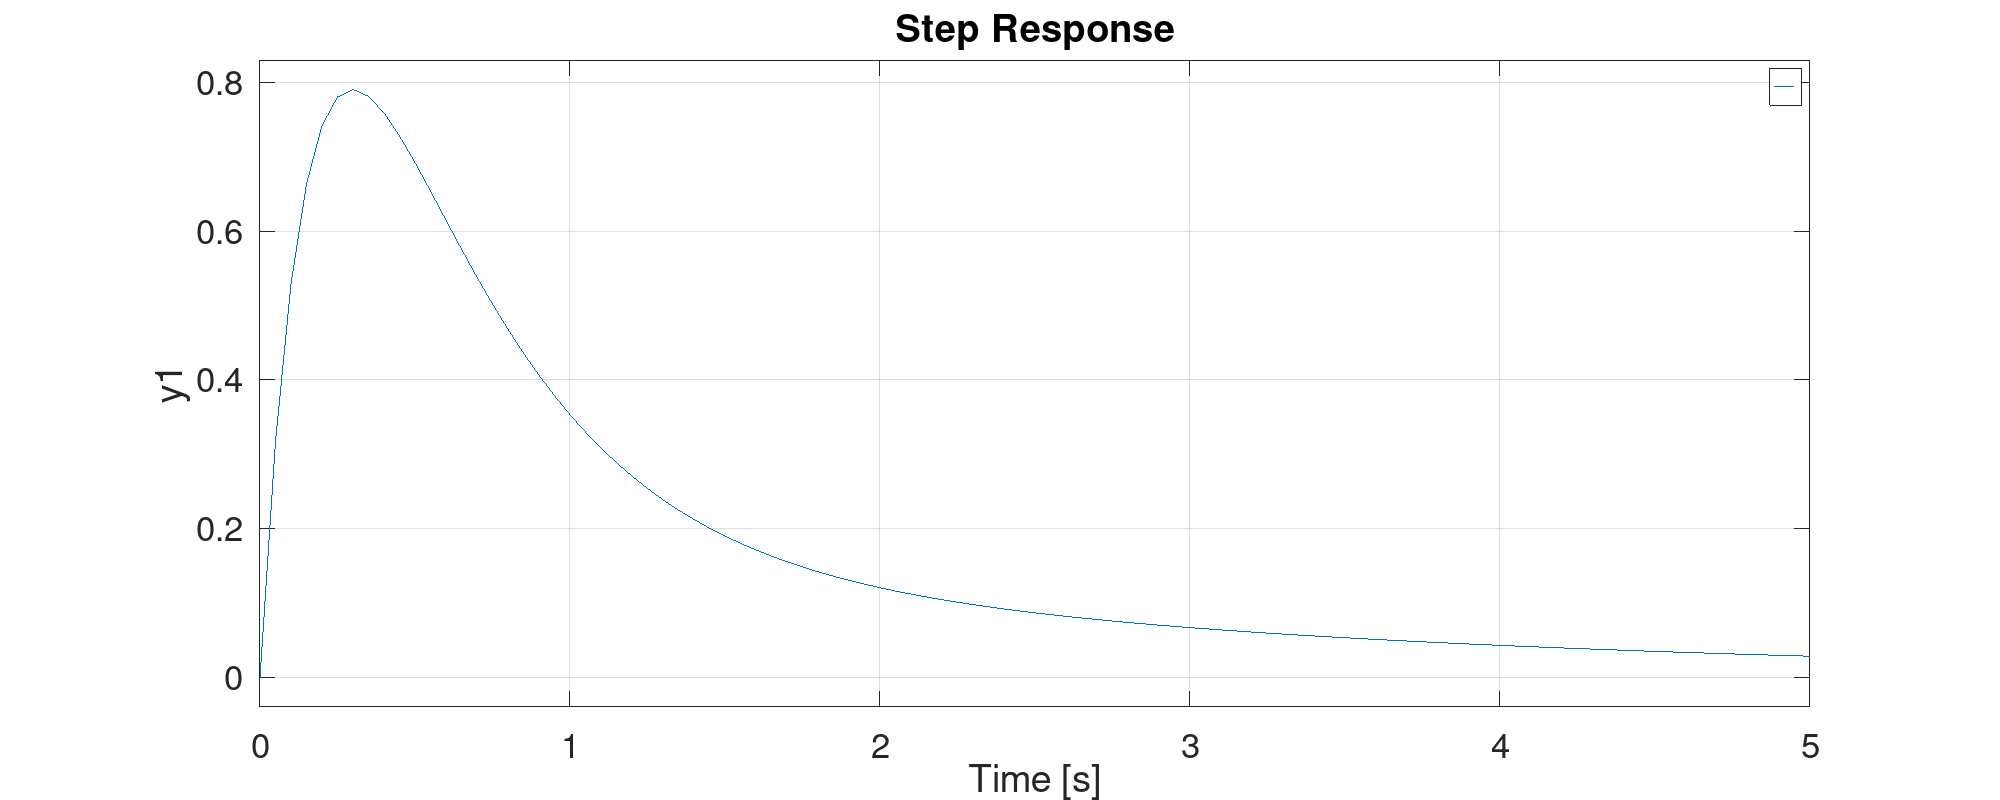

In [217]:
D = 15*(1+1.5*s);

figure('position',[0,0,2000,800])
step(feedback(D*G_theta,1),5)

figure('position',[0,0,2000,800])
rlocus((D*G_theta),10);
[r,k] = rlocus((D*G_theta),10);

k

error: 'G_theta' undefined near line 1, column 1
error: 'CL_theta' undefined near line 1, column 1
error: 'CL_theta' undefined near line 1, column 1
error: 'CL_theta' undefined near line 1, column 1
error: 'CL_theta' undefined near line 1, column 1
error: 'CL_theta' undefined near line 1, column 1


Inline plot failed, consider trying another graphics toolkit
error: matrix cannot be indexed with {
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



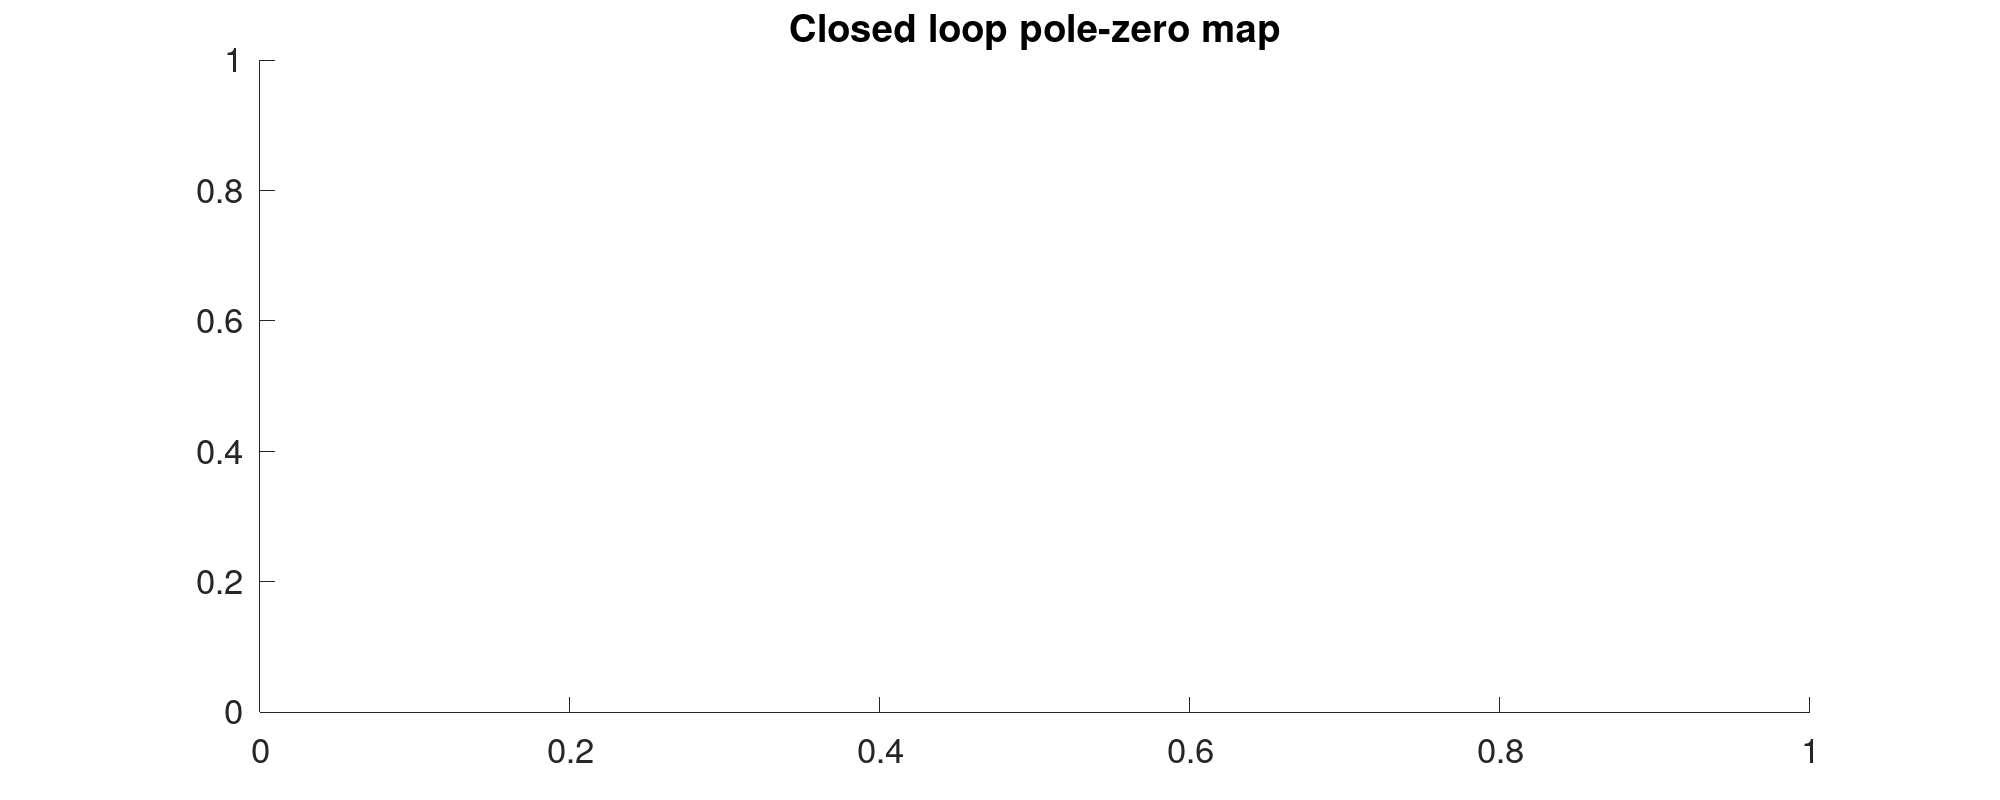

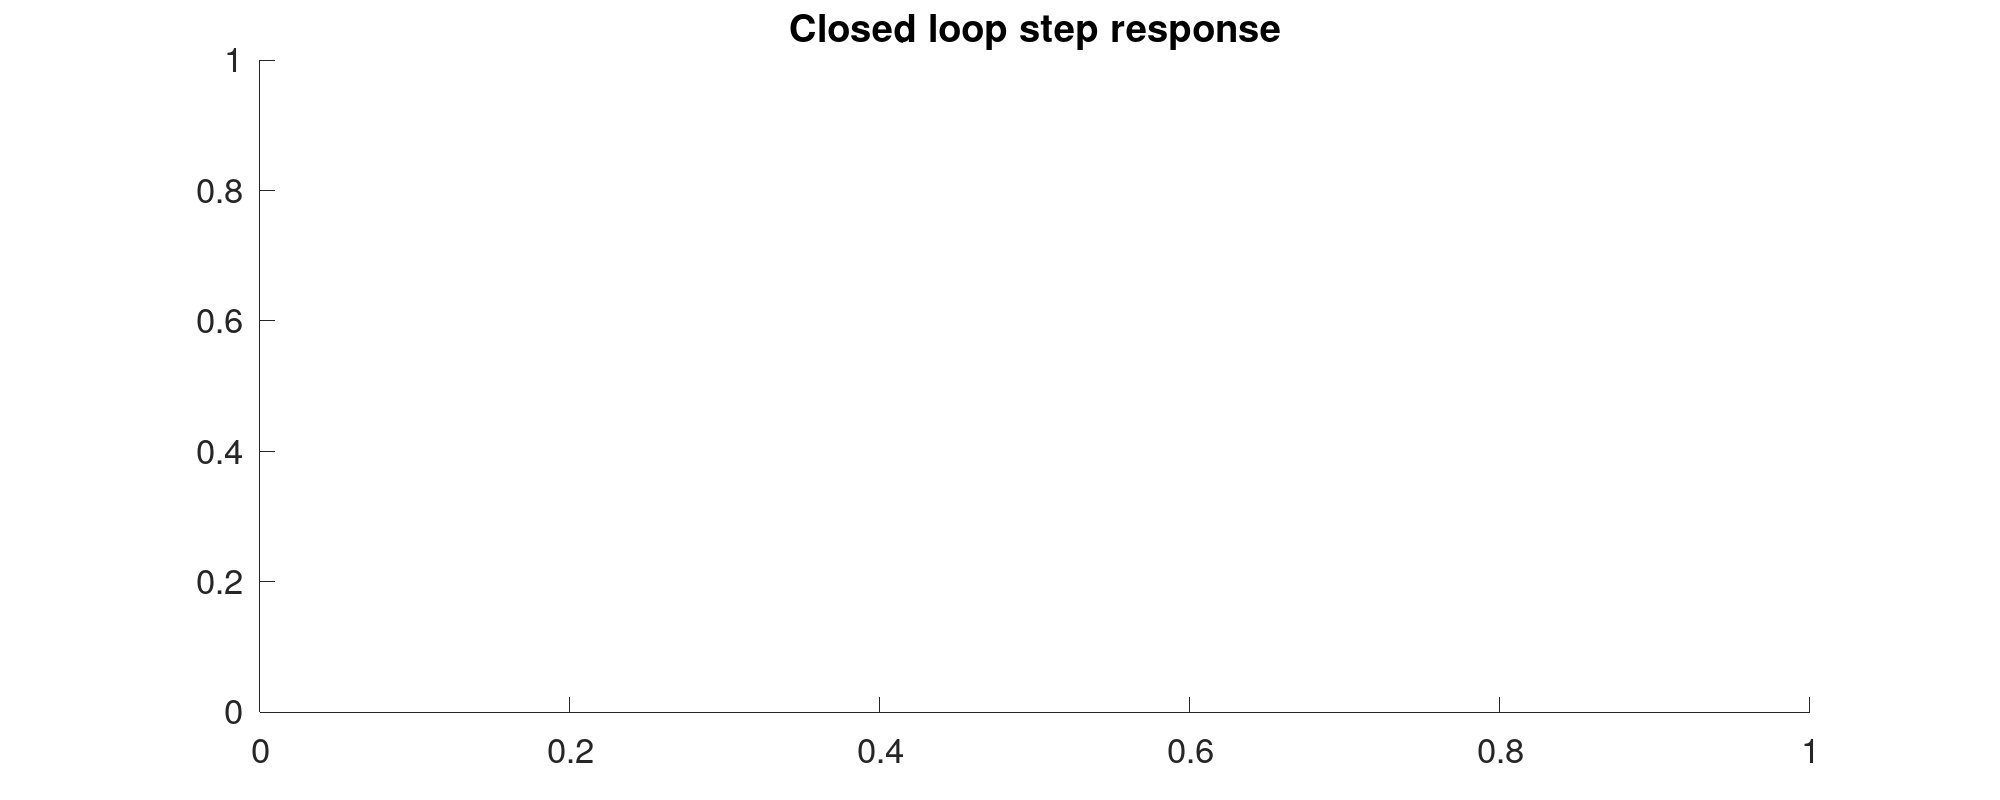

In [210]:
%% Inner loop (D_theta feedback)

# kptheta = 5 ; Tdtheta = 28 ; Titheta = 304;
kptheta = 20 ; Tdtheta = 1.6 ; Titheta = 0;
D_theta = kptheta*(1+Tdtheta*s+Titheta/s);

D_theta = D;

% 0.2, 0.1, 0

% Closed loop
CL_theta = (D_theta*G_theta)/(1+D_theta*G_theta)
minreal(CL_theta);
Z = zero(minreal(CL_theta))
P = pole(minreal(CL_theta))

% Plots
figure('position',[0,0,2000,800])
step(CL_theta,5)
title("Closed loop step response")

figure('position',[0,0,2000,800])
pzmap(CL_theta)
title("Closed loop pole-zero map")

---
# Outer $D_X$ controller

In [211]:
figure('position',[0,0,2000,1200])
pole(minreal(CL_theta*G_x))
zero(minreal(CL_theta*G_x))
rlocus(CL_theta*G_x)

error: 'CL_theta' undefined near line 1, column 1
error: 'CL_theta' undefined near line 1, column 1
error: 'CL_theta' undefined near line 1, column 1


Inline plot failed, consider trying another graphics toolkit
error: matrix cannot be indexed with {
error: called from
    _make_figures>safe_print at line 125 column 7
    _make_figures at line 49 column 13



error: 'CL_theta' undefined near line 1, column 1
error: 'CL_x' undefined near line 1, column 1
error: 'CL_x' undefined near line 1, column 1
error: 'CL_x' undefined near line 1, column 1
error: 'CL_x' undefined near line 1, column 1


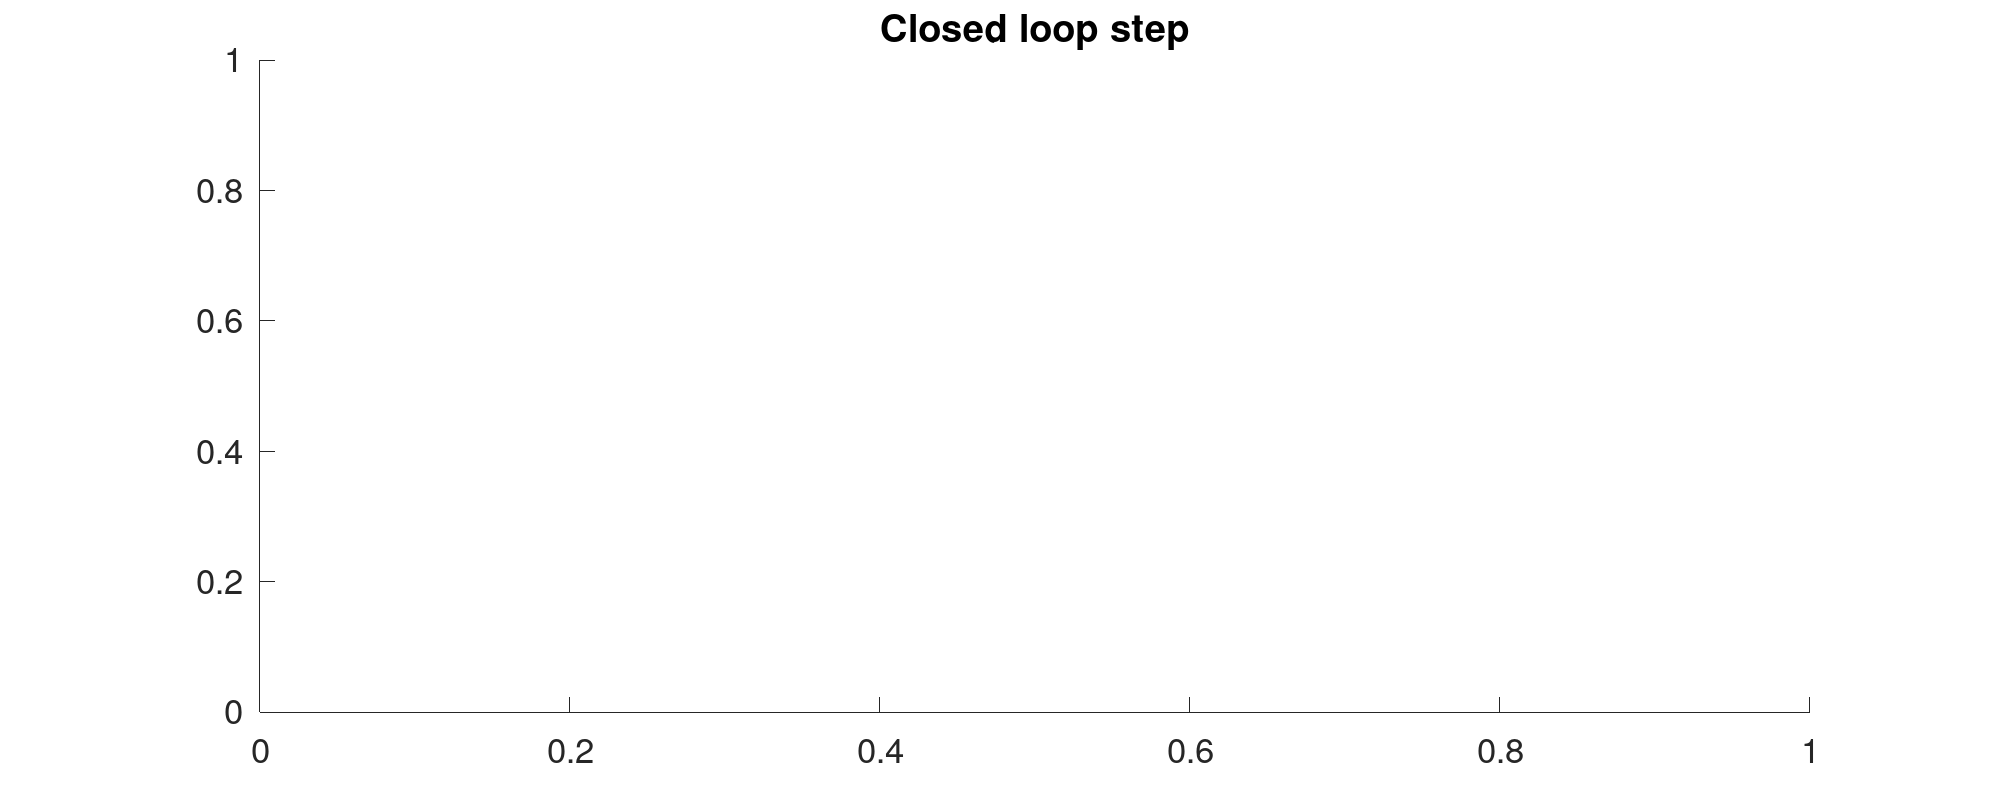

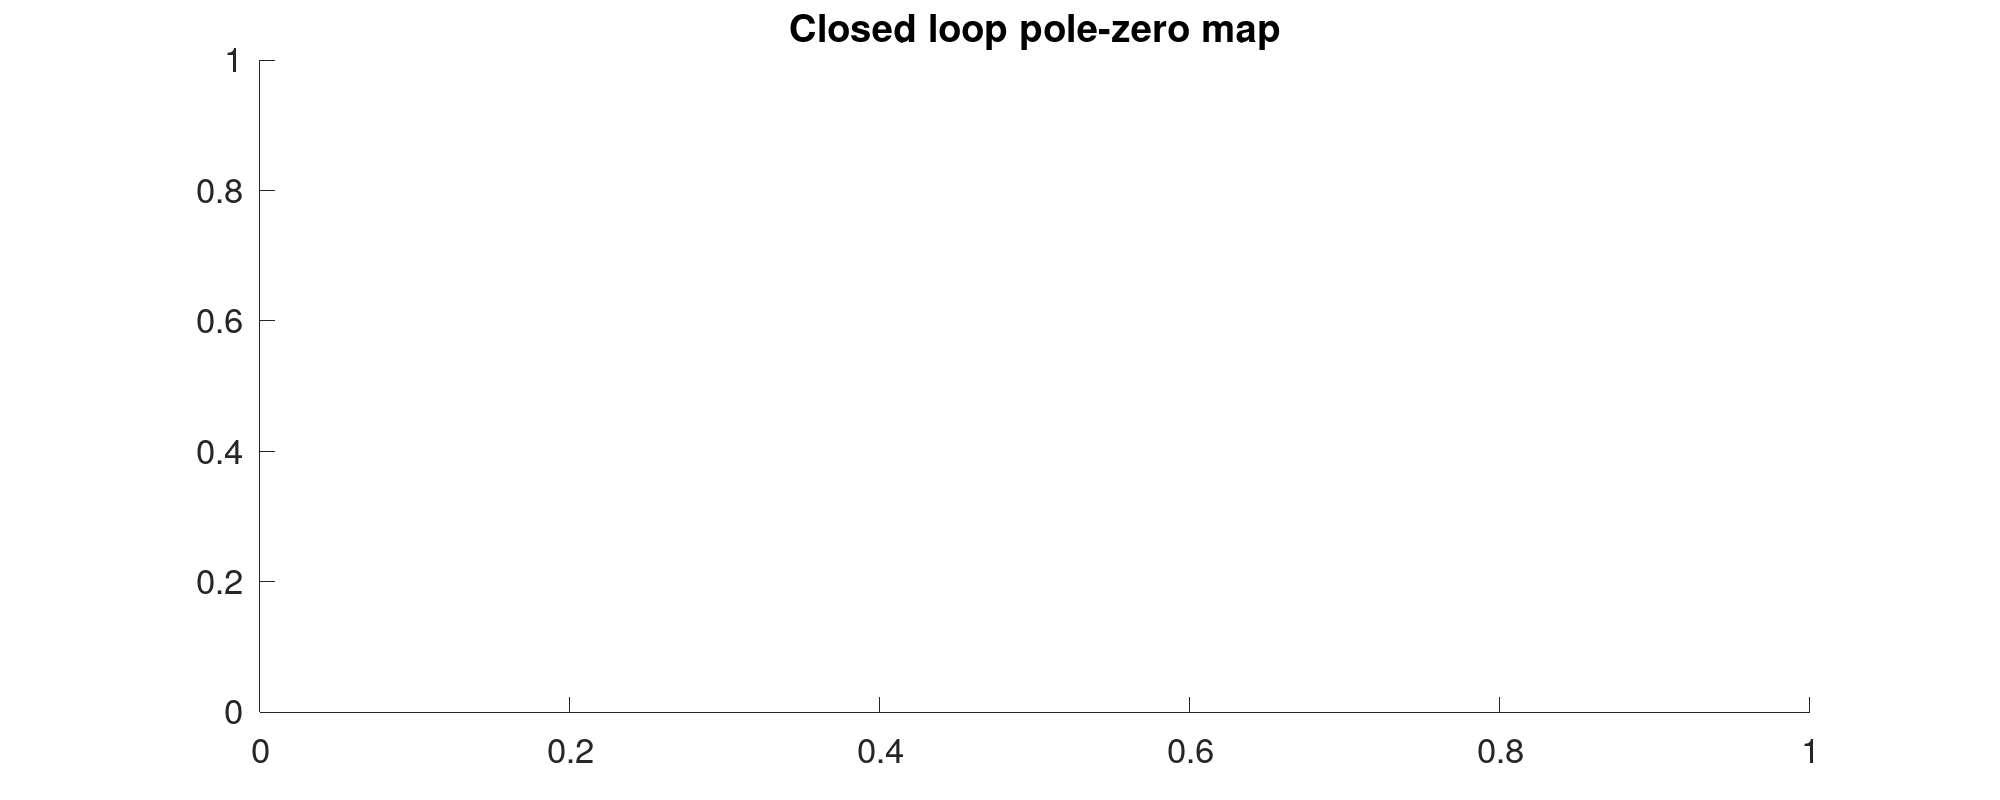

In [212]:
%% Outer loop (D_x feedback)

kpx = 0.1 ; Tdx = 0.2 ; Tix = 0.0;
D_x = kpx*(1+Tdx*s+Tix/s);

D_x = 1 + 0.1*s;

% Closed loop
CL_x = minreal((CL_theta*G_x*D_x)/(1+CL_theta*G_x*D_x))
Z = zero(minreal(CL_x));
P = pole(minreal(CL_x));

% Plots
figure('position',[0,0,2000,800])
pzmap(CL_x)
title("Closed loop pole-zero map")

figure('position',[0,0,2000,800])
step(CL_x,30)
title("Closed loop step")